In [10]:
import numpy as np
import os
import matplotlib.pyplot as plt
from glob import glob

import cv2
from scipy import ndimage

In [2]:
import pickle

with open('alldata.pkl', 'rb') as in_file:
    data = pickle.load(in_file)

In [3]:
biosensor = []
masks = []

for d in data:
    # biosensor.append(d['biosensor'])
    masks.append(d['mask'])

In [4]:
test_mask = masks[21]

# Nincs annyi sejt a maszkon ahány számmal jelöltük
print(np.unique(test_mask))
np.unique(test_mask).shape

[  0   7   8   9  13  14  17  19  21  22  23  24  25  26  27  28  32  33
  35  39  40  41  42  43  47  48  51  53  54  56  57  59  60  61  62  63
  64  65  66  67  68  73  74  75  76  77  78  79  80  81  83  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 112 114 115 116 119 122 123
 124 125 126 129 130 131 132 133 134 135 137 138 139 140 141 143 144 148
 149 150 151 152 153 154 155 156 157 158 159 160 161 162 167 169 170 171
 173 174 175 176 177 178 179 181 182 184 185 187 188 189 190 191 192 193
 195 196 197 198 200 201 202 203 204 205 206 207 208 209 210 211 212 213
 214 215 217 218 219 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 255
 256 257 258 259 260 261 262 263 264 265 266 267 268 270 271 272 273 274
 275 276 277 278 279 283 284 285 286 287]


(208,)

In [5]:
labeled_mask, num_cells = ndimage.label(test_mask)  # Label each cell
centers = ndimage.center_of_mass(test_mask, labeled_mask, range(1, num_cells+1))
# centers = np.round(centers).astype(int)  # Round to nearest integer
print(num_cells)

181


In [6]:
mask = test_mask.astype(np.uint8)  # Convert to 8-bit unsigned integer
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(mask, connectivity=8)
# centroids = np.round(centroids[1:]).astype(int)  # Round to nearest integer, skip background
print(num_labels)

182


In [7]:
# Ez minden egyedi sejtet külön számol de lassú

# Get unique cell numbers, excluding 0
cell_numbers = np.unique(test_mask)[1:]

# Calculate average row and column indices for each cell number
avg_indices = [np.mean(np.argwhere(test_mask == cell_num), axis=0) for cell_num in cell_numbers]

# Convert to list of tuples
cell_centers_raw = [tuple(indices) for indices in avg_indices]

print(len(cell_centers_raw))

207


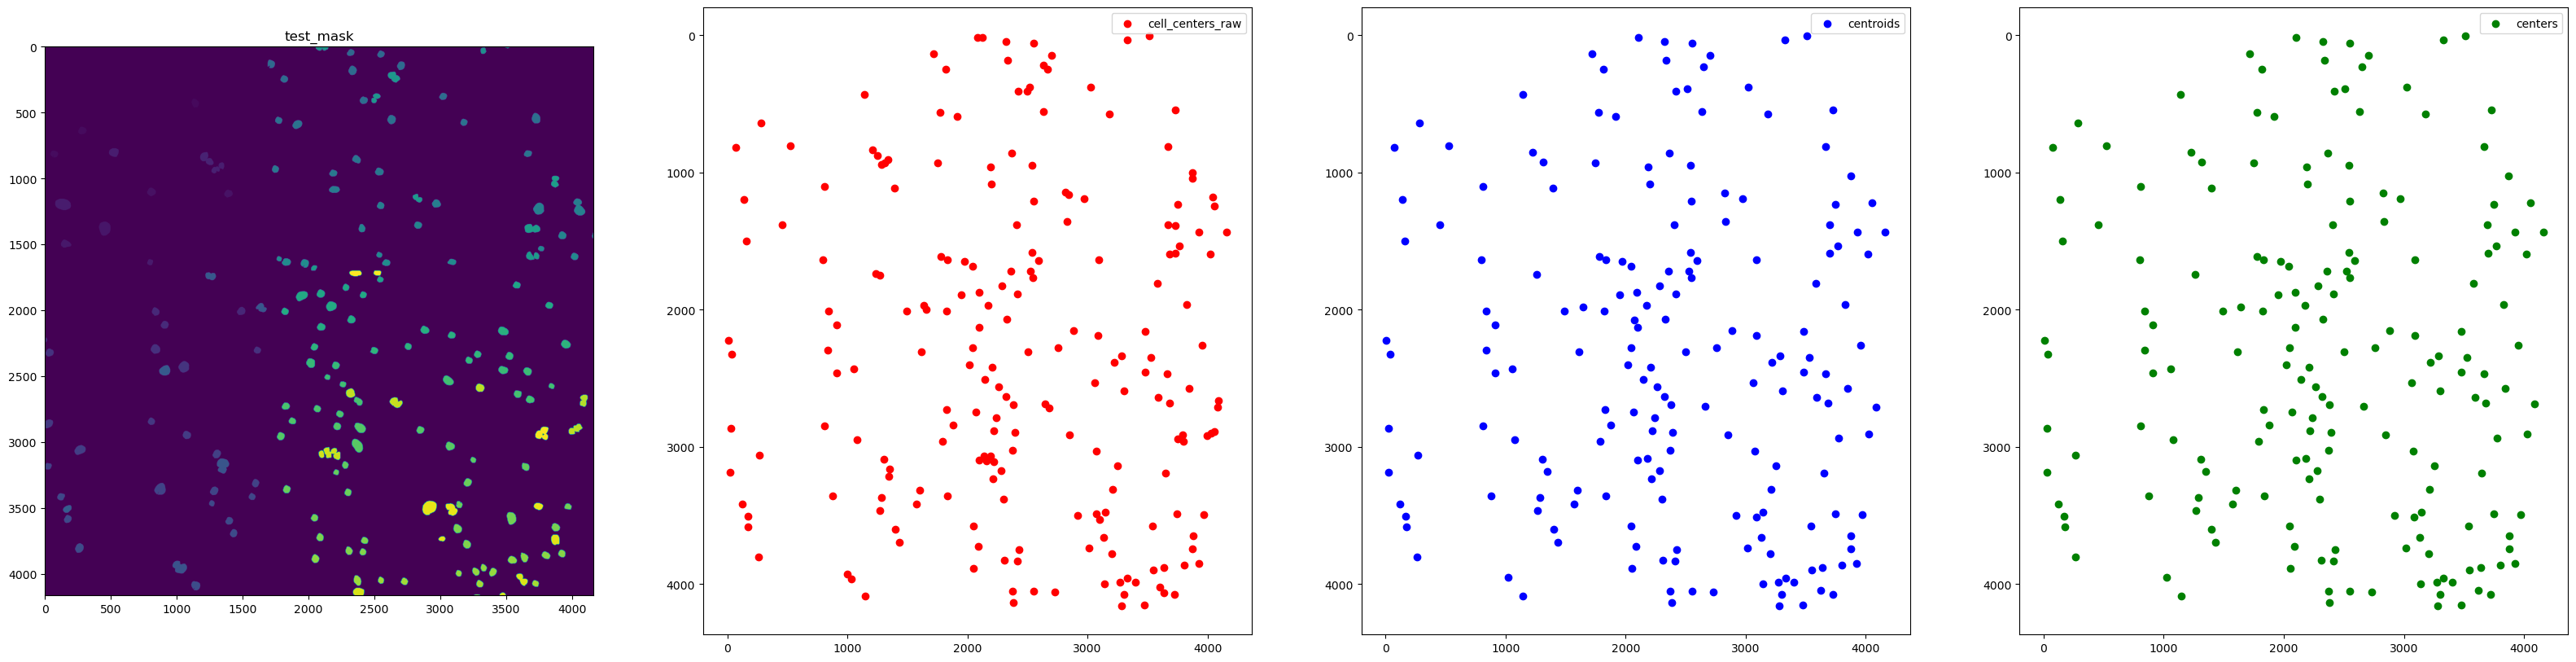

In [8]:
# Unpack the coordinates
cell_centers_raw_x, cell_centers_raw_y = zip(*cell_centers_raw)
centroids_x, centroids_y = zip(*centroids)
centers_x, centers_y = zip(*centers)

fig, axs = plt.subplots(1, 4, figsize=(40, 10))

# Plot the test_mask
axs[0].imshow(test_mask)
axs[0].set_title('test_mask')

# Raw np calculation
axs[1].scatter(cell_centers_raw_y, cell_centers_raw_x, c='red', label='cell_centers_raw')
axs[1].invert_yaxis()
axs[1].legend()

# CV
axs[2].scatter(centroids_x, centroids_y, c='blue', label='centroids')
axs[2].invert_yaxis()  # Invert the y-axis
axs[2].legend()

# ndimage
axs[3].scatter(centers_y, centers_x, c='green', label='centers')
axs[3].invert_yaxis()
axs[3].legend()

plt.show()

In [14]:
all_npz = glob('data/*.npz')
# print(all_npz)

alldata = []
for file in all_npz:
    with np.load(file) as data:
        # print(data['old_filename'] , data['biosensor'].shape, data['mask'].shape)
        alldata.append({'old_filename': data['old_filename'], 'biosensor': data['biosensor'], 'mask': data['mask']})

alldata.sort(key=lambda x: x['old_filename'])

fibronectin\20200722_Preo_Hela_fn\A4_seg.npz (717, 80, 80) (4159, 4159)
fibronectin\20200722_Preo_Hela_fn\B4_seg.npz (717, 80, 80) (4253, 4253)
fibronectin\20210526_LCLC_fn\B2_seg.npz (1140, 80, 80) (4210, 4210)
noncoated\20210407_LCLC_H838_nonc\C3_seg.npz (581, 80, 80) (3881, 4173)
noncoated\20210407_LCLC_H838_nonc\C4_seg.npz (581, 80, 80) (4063, 4158)
noncoated\20210408_MDAMB231_HepG2_nonc\A1_seg.npz (851, 80, 80) (4213, 4213)
noncoated\20210408_MDAMB231_HepG2_nonc\A2_seg.npz (851, 80, 80) (3599, 3497)
noncoated\20210408_MDAMB231_HepG2_nonc\A3_seg.npz (851, 80, 80) (4120, 4182)
noncoated\20210408_MDAMB231_HepG2_nonc\A4_seg.npz (851, 80, 80) (4258, 4258)
noncoated\20210408_MDAMB231_HepG2_nonc\B1_seg.npz (851, 80, 80) (3319, 3905)
noncoated\20210408_MDAMB231_HepG2_nonc\B2_seg.npz (851, 80, 80) (4144, 4144)
noncoated\20210408_MDAMB231_HepG2_nonc\B3_seg.npz (851, 80, 80) (3728, 4032)
noncoated\20210408_MDAMB231_HepG2_nonc\B4_seg.npz (851, 80, 80) (3754, 3972)
fibronectin\20210526_LCLC_fn

In [15]:
# Sorted by filename
for data in alldata:
    print(data['old_filename'] , data['biosensor'].shape, data['mask'].shape)

fibronectin\20200722_Preo_Hela_fn\A4_seg.npz (717, 80, 80) (4159, 4159)
fibronectin\20200722_Preo_Hela_fn\B4_seg.npz (717, 80, 80) (4253, 4253)
fibronectin\20200722_Preo_Hela_fn\C4_seg.npz (717, 80, 80) (4179, 4179)
fibronectin\20200729_Preo_Hela_fn\B4_seg.npz (1189, 80, 80) (4204, 4204)
fibronectin\20200729_Preo_Hela_fn\C4_seg.npz (1189, 80, 80) (4235, 4235)
fibronectin\20210526_LCLC_fn\A1_seg.npz (1140, 80, 80) (4190, 4190)
fibronectin\20210526_LCLC_fn\A2_seg.npz (1140, 80, 80) (4169, 4169)
fibronectin\20210526_LCLC_fn\A3_seg.npz (1140, 80, 80) (4223, 4223)
fibronectin\20210526_LCLC_fn\A4_seg.npz (1140, 80, 80) (4234, 4234)
fibronectin\20210526_LCLC_fn\B1_seg.npz (1140, 80, 80) (4159, 4159)
fibronectin\20210526_LCLC_fn\B2_seg.npz (1140, 80, 80) (4210, 4210)
fibronectin\20210526_LCLC_fn\B3_seg.npz (1140, 80, 80) (4154, 4154)
fibronectin\20210526_LCLC_fn\B4_seg.npz (1140, 80, 80) (4201, 4201)
fibronectin\20210526_LCLC_fn\C1_seg.npz (1140, 80, 80) (4239, 4239)
fibronectin\20210526_LCLC_

In [17]:
# Ez minden egyedi sejtet külön számol de lassú
for data in alldata:
    mask = data['mask']
    # Get unique cell numbers, excluding 0
    cell_numbers = np.unique(mask)[1:]
    # Calculate average row and column indices for each cell number
    avg_indices = [np.mean(np.argwhere(mask == cell_num), axis=0) for cell_num in cell_numbers]
    # Convert to list of tuples
    cell_centers = [tuple(indices) for indices in avg_indices]
    data['cell_centers'] = cell_centers
    print(data['old_filename'] , len(data['cell_centers']))

fibronectin\20200722_Preo_Hela_fn\A4_seg.npz 85
fibronectin\20200722_Preo_Hela_fn\B4_seg.npz 405
fibronectin\20200722_Preo_Hela_fn\C4_seg.npz 300
fibronectin\20200729_Preo_Hela_fn\B4_seg.npz 461
fibronectin\20200729_Preo_Hela_fn\C4_seg.npz 248
fibronectin\20210526_LCLC_fn\A1_seg.npz 55
fibronectin\20210526_LCLC_fn\A2_seg.npz 36
fibronectin\20210526_LCLC_fn\A3_seg.npz 51
fibronectin\20210526_LCLC_fn\A4_seg.npz 39
fibronectin\20210526_LCLC_fn\B1_seg.npz 50
fibronectin\20210526_LCLC_fn\B2_seg.npz 47
fibronectin\20210526_LCLC_fn\B3_seg.npz 47
fibronectin\20210526_LCLC_fn\B4_seg.npz 41
fibronectin\20210526_LCLC_fn\C1_seg.npz 50
fibronectin\20210526_LCLC_fn\C2_seg.npz 46
fibronectin\20210526_LCLC_fn\C3_seg.npz 55
fibronectin\20210526_MCF7_fn\A1_seg.npz 162
fibronectin\20210526_MCF7_fn\A2_seg.npz 168
fibronectin\20210526_MCF7_fn\A3_seg.npz 153
fibronectin\20210526_MCF7_fn\A4_seg.npz 141
fibronectin\20210526_MCF7_fn\B1_seg.npz 189
fibronectin\20210526_MCF7_fn\B2_seg.npz 207
fibronectin\2021052

In [20]:
# Saving the data with the centers
file_number = 0
for data in alldata:
    filename = f'data_with_centers/{file_number}.npz'
    np.savez(filename, **data)
    file_number += 1

In [9]:
# A maszkokon meg kell keresni az összes sejt középpontját, és azok kooordinátáit kell eltárolni
centers_ndimage = []
centers_cv = []

# Assuming masks is a list of 2D numpy arrays
for mask in masks:
    labeled_mask, num_cells = ndimage.label(mask)  # Label each cell
    centers = ndimage.center_of_mass(mask, labeled_mask, range(1, num_cells+1))
    # centers = np.round(centers).astype(int)  # Round to nearest integer
    centers_ndimage.append(centers)  # Store the centers

    mask = mask.astype(np.uint8)  # Convert to 8-bit unsigned integer
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(mask, connectivity=8)
    # centroids = np.round(centroids[1:]).astype(int)  # Round to nearest integer, skip background
    centers_cv.append(centroids)  # Print or store the centers

In [10]:
# Ez egyel kevesebb mert a 0-t is beleveszi
num_cells_unique = []
for mask in masks:
    num_cells_unique.append(np.unique(mask).shape[0])


In [11]:
found_cells_nd = []
found_cells_cv = []
for center in centers_ndimage:
    found_cells_nd.append(center.shape[0])
for center in centers_cv:
    found_cells_cv.append(center.shape[0])

In [13]:
for i in range(len(num_cells_unique)):
    print(i, num_cells_unique[i], found_cells_nd[i], found_cells_cv[i])

0 86 76 77
1 406 358 351
2 301 293 288
3 462 441 438
4 249 241 239
5 56 56 56
6 37 35 36
7 52 51 52
8 40 38 39
9 51 45 46
10 48 45 46
11 48 47 48
12 42 41 42
13 51 48 49
14 47 45 46
15 56 55 56
16 163 157 158
17 169 166 166
18 154 145 146
19 142 134 135
20 190 172 172
21 208 181 182
22 133 123 124
23 123 115 116
24 207 202 202
25 200 196 195
26 140 139 140
27 158 157 158
28 204 199 200
29 245 240 241
30 218 215 214
31 208 203 203
32 160 157 157
33 222 218 218
34 228 222 223
35 228 223 222
36 220 213 213
37 222 219 219
38 243 238 238
39 263 260 258
40 78 77 78
41 81 77 78
42 97 96 97
43 93 91 92
44 87 85 86
45 82 80 81
46 53 52 53
47 69 68 69
48 46 45 46
49 54 53 54
50 60 57 58
51 52 51 52
52 77 76 77
53 100 99 100
54 86 83 84
55 81 80 81
56 94 91 92
57 82 81 81
58 48 47 48
59 34 33 34
60 51 50 51
61 39 39 40
62 44 43 44
63 44 43 44
64 60 58 59
65 36 36 35
66 65 64 65
67 34 32 32
68 107 104 105
69 24 23 24
70 64 63 64
71 23 22 23
72 35 34 35
73 30 28 29
74 61 60 61
75 182 180 181
76 119